# Исследование рынка игровой индустрии

В нашем распоряжении данные из открытых источников, нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Необходимо выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют в игровой индустрии. Сначала получим общее представление о данных, затем выполним предобработку данных, обработаем пропуски, изучим аномалии, поищем интересные особенности и зависимости, существующие на рынке для определения закономерностей, определяющие успешность игры.

Сам датасет предоставлен в формате csv.

Описание прзнаков:

- `Name` - название игры
- `Platform ` - платформа
- `Year_of_Release ` - год выпуска
- `Genre ` - жанр игры
- `NA_sales ` - продажи в Северной Америке (миллионы проданных копий)
- `EU_sales ` - продажи в Европе (миллионы проданных копий)
- `JP_sales ` - продажи в Японии (миллионы проданных копий)
- `Other_sales ` - продажи в других странах (миллионы проданных копий)
- `Critic_Score ` - оценка критиков (максимум 100)
- `User_Score ` - оценка пользователей (максимум 10)
- `Rating` - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Файл с данными и изучение общей информации.

#### Обзор данных

Импортировали необходимые библиотеки и открыли датасет, просмотрели последние пять строк, так узнали общее количество записей в датасете и посмтрели на представление данных последних пяти строк

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import random

In [3]:
data = pd.read_csv('games.csv')

In [4]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Получили общую информацию о датасете

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Заметили, что:

- год выпуска (`Year_of_Release`) представлена в формате *float*
- столбец с оценкой критиков (`Critic_Score`) содержит в себе наибольшее количество пропусков, около половины датасета
- столбец с оценкой пользователей (`User_Score`) содержит в себе большое количество пропусков, почти половина датасета
- столбец с возрастным рейтингом (`Rating`) содержит в себе большое количество пропусков, почти половина датасета
- есть некоторое количество пропусков в:
 - наименовании игры (`Name`)
 - в горде релиза (`Year_of_Release`)
 - жанре игры (`Genre`)

#### Гистограмма всех числовых значений

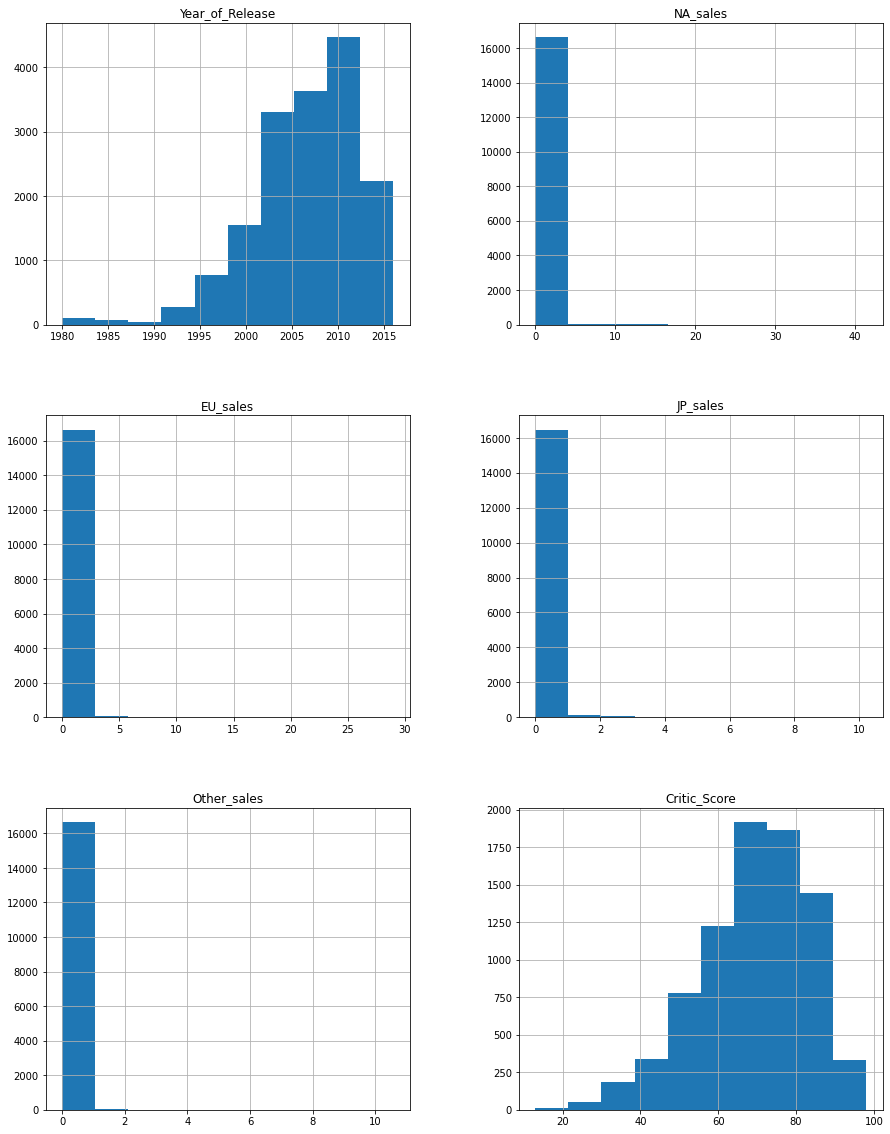

In [5]:
data.hist(figsize=(15, 20));

#### Обзор числовых значений

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


#### Обзор пропущенных значений

In [7]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
def nan_percent_plot(df):
    nan_percent = df.isna().mean()*100
    if nan_percent[nan_percent.values > 0].count() > 0:
        (
            nan_percent[nan_percent.values > 0]
            .sort_values(ascending=True)
            .plot(kind = 'barh', figsize=(16, 6), fontsize=22).set_title('Процент пропущенных значений' + "\n", fontsize=22)
        );
    else:
        print('Пропусков не найдено')

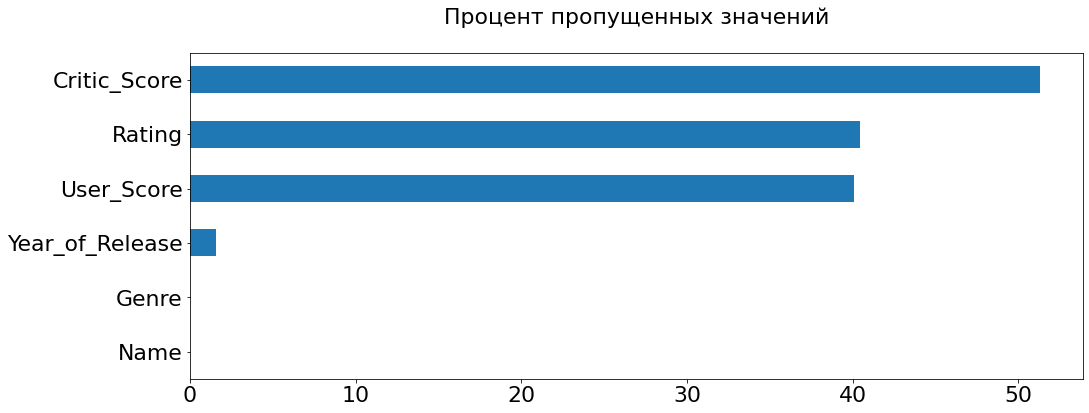

In [9]:
nan_percent_plot(data)

#### Вывод

В датасете представлено 16715 записей в 11 столбцах 6 из которых содержат в себе пропуски, самой большой колонкой по количеству пропусков является столбец с оценкой критиков, а далее как на графике процента пропущенных значений идет возрастной рейтинг, пользовательские оценки и год релиза, минимальное количество пропусков в жанре и наименовании игры. Исходя из гистограммы всех числовых значений большинство продаж осуществляются на территории Северной Америки. Датасет берет свое начало с 1980 по 2016 год. Средний год продаж - 2006

Столбец год релиза и оценка пользователей имеют неправильный формат данных.

### Предобработка данных

#### Переименование наименований столбцов

Сначала переименовали названия столбцов, а именно привели их к нижнему регистру:

In [10]:
data.columns = data.columns.str.lower()

#### Очистка от явных дубликатов

Далее, очистили датасет от строк-дубликатов по двум повторяющимся признакам `название игры - платформа`:

In [11]:
data[data.duplicated(['name', 'platform'])].count()

name               4
platform           5
year_of_release    4
genre              4
na_sales           5
eu_sales           5
jp_sales           5
other_sales        5
critic_score       4
user_score         4
rating             4
dtype: int64

In [12]:
data = data[~data.duplicated(['name', 'platform'])]

#### Обработка столбца с наименованиями игр

Этот столбец содержит всего два пропуска, вероятно из-за технической ошибки, заполним пропуски значением "unknown"

In [13]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [14]:
data['name'] = data['name'].fillna('unknown')

#### Обработка столбца с годом релиза

Пропуски с годом релиза можно было бы объяснить тем, что релиза так и не случилось, был анонс, но релиз по каким-либо причинам провалися, однако, по первым пяти записям, отфильтрованным по пропускам в годе релиза, можно сказать, что игра продавалась. В названиях некоторых игр есть год, можно предположить, что пропуски вызваны тех сбоем. Заменили пропуски нулями, так как заполнять их средним или медианной нет возможности из-за отсутствия связей, заполнять нулями необхожимо так как столбец имеет формат *float* из-за пропусков, а необходимо перевести в другой формат представления данных, удалять не стоит так как строки могут содержать в себе другие полезные сведения, в дальнейшем в исследованиии этого столбца, игнорировали нулевые значения.

Заполнили нулями и перевели в тип *int*

In [15]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype('int')

#### Столбец с жанром игры

В этом столбце всего два пропуска, заполнить их чем-то не получится, так как это жанр, он должен быть указан, удалили пропуски из датасета:

In [16]:
data = data[~data['genre'].isna()]

#### Обработка столбца с оценкой критиков

Так как оценка критиков строится на 100-бальной системе, заменили пропуски на число -1 чтобы была возможность перевести в тип *int*, так как пропуски обладают вещественными значениями, а не целочисленными, а дальнейшем в исследовании с участием этого столбца игнорируем заглушки. Заполнить их в завимости от других признаками не представляется возможным. Можно предположить, что чем больше продаж тем больше должна быть оценка, от этого и строить зависимость для заполнения пропусков, однако, такой подход не учитываеть возможность поставить высокую оценку качественному продукту, но в силу ограниченного рекламного бюджета не смогла хорошо продаться. 

Пропуски можно объяснить техсбоем или непопулярностью игры (не для всех игр существуют оценки пользователей или критиков), также возможно в совокупности с тем, что датасет берет свое начало от 1980 года, когда рейтиновых служб и обширных систем оценки не было.

In [17]:
data['critic_score'] = data['critic_score'].fillna(-1).astype('int')

#### Обработка столбца с оценкой пользователей

Оценка пользователей построена по 10-бальной системе с вещественным значением. Из-за отсутствия связи и без необходимости переводить в другой тип данных, оставили пропуски как есть.

В столбце присутсвуют значения с аббривеатурой *tbd* расшифровывается как To Be Determined, то есть "Будет определено", в случае когда разработчик или издатель анонсировал продукт, ему может быть присвоено значение *tbd* для дальнейшей оценки после релиза, тот факт что они присутствуют в датасете может говорить о том, что релиза не состоялось либо резил был, но оценки по каким-либо причинам не было.

Заменили значение *tbd* на пропуск, так как можно считать, что оценки не было, также перевели в вещественный тип.

In [18]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

#### Обработка столбца с рейтингом

Так как рейтинговое агентство ESRB основано в 1994, а датасет берет начало от 1980 года логично предположить, что записей о рейтинге тогда еще не было, значит оставляем пропуски как есть, не трогая их.

Также пропуски можно объяснить работой других рейтинговых агенств, в стране издателя

В столбце rating есть два значения '*K-A*' и '*E10+*' - это два значения носящие один и тот же смысл (первоначально "*K-A*" ("Kids to Adults"), потом было переименовано на *E10+*), поэтому переименовали '*K-A*' в '*E10+*' для удобного и более точного анализа в дальнейшем.

In [19]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E10+'

В системе рейтинга ESRB предусмотрен заполнитель для игр которые ожидают классификации, также пропуски можно объяснить и тем что некоторым играм было по каким-либо причинам отказано в классификации, такие игры большинство магазинов не принимают.

Примем, что отсутствие оценки не вызвано тех сбоем при сборе данных, в этом вопросе следует обратиться к ответсвтенным лицам, чтобы узнать подробнее о природе пропуска, в данный момент в целях избавления от пропусков, заменили их на классификатор *RP* - рейтинговый заполнитель для игр ожидающих классификации

In [20]:
data['rating'] = data['rating'].fillna('undefined')

Заполнили пропуски рейтинговым заполнителем (что-то вроде tbd в оценке пользователей, "будет оценено"), не факт, конечно, что рейтинговое агенство именно заполнитель поставило, возможно игра разработана на очень любительском уровне, либо ей просто отказали в доступе, знать бы откуда данные. Можно конечно изучить строки с пропусками в рейтинге, есть ли среди них игры популярные, которые просто не могут быть не оценены, но в этом случае можно подумать про техническую неисправность при выгрузке\парсинге (или еще чего) данных

In [21]:
data['rating'].value_counts()

RP      6767
E       3989
T       2959
M       1563
E10+    1422
EC         8
AO         1
Name: rating, dtype: int64

#### Общие продажи

Посчитали и добавили общие продажи по всем регионам в отдельный столбец

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

#### Вывод

При предобработке данных, переименовали столбцы, привели к нижнему регистру названия, обработали столбцы с:
- наименованием игры
- годом релиза
- жанром игры
- оценкой критиков
- оценкой пользователей
- рейтингом

При обработке пропусков в основном ограничивались заглушками, так в столбцах наименований, годом релиза, оценками критиков и пользователей заменили пропуски заглушками, например, для того чтобы была возможность корректно изменить тип данных, для дальнейшего анализа.

Запонлнить оценку синтетическим значением нельзя так как это неизбежно приведет к искажению данных, так как чтобы иметь такую возможность необходимо иметь больше связей с другими признаками, также это невозможно из-за того, что данные колонки содержат в себе слишком много пропусков, до половины от всего датасета, заполнить одними и теми же синтетическими значениями так чтобы они не исказили данные, процесс если, он возможен, невероятно трудоемкий. Тех данных, что уже есть вполне достаточно для проведения исследовательского анализа.

Посчитали и добавили новый столбец общих продаж по все регионам.

### Исследовательский анализ данных

#### Общие продажи по годам

Посмотрели как продавались игры по годам, для оценки важности периодов

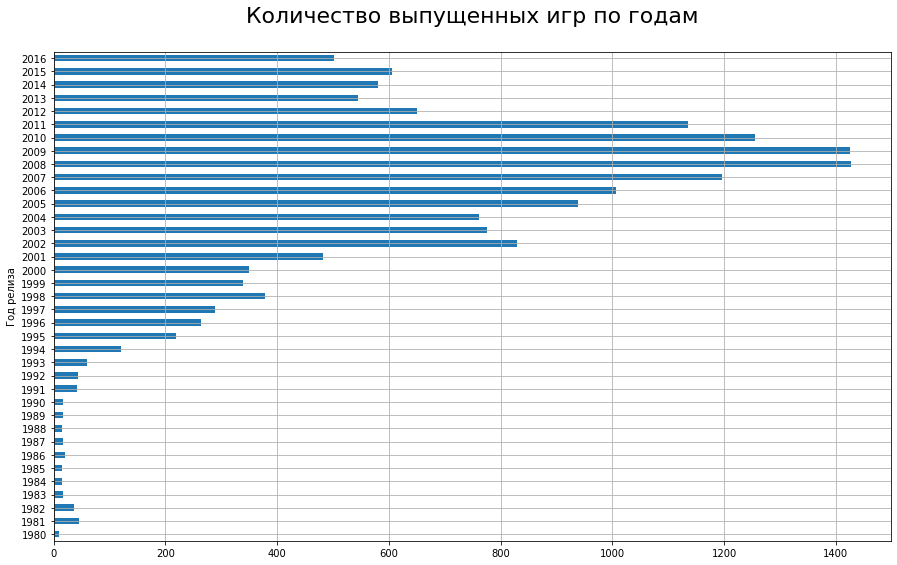

In [23]:
(
    data[data['year_of_release'] != 0]
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .reset_index()
    .plot(x='year_of_release', y='name', kind='barh', figsize=(15, 9), xlabel='Год релиза',
          ylabel='Количество игр', legend=False, grid=True)
    .set_title('Количество выпущенных игр по годам' + '\n', fontsize=22)
);

До 1994 года выпускалось не так много игр, поэтому данными до 1994 года можно пренебречь

#### Как менялись продажи по платформам

Посмотрели, как менялись продажи по платформам. Выбрали платформы с суммарными продажами и построили распределение по годам.

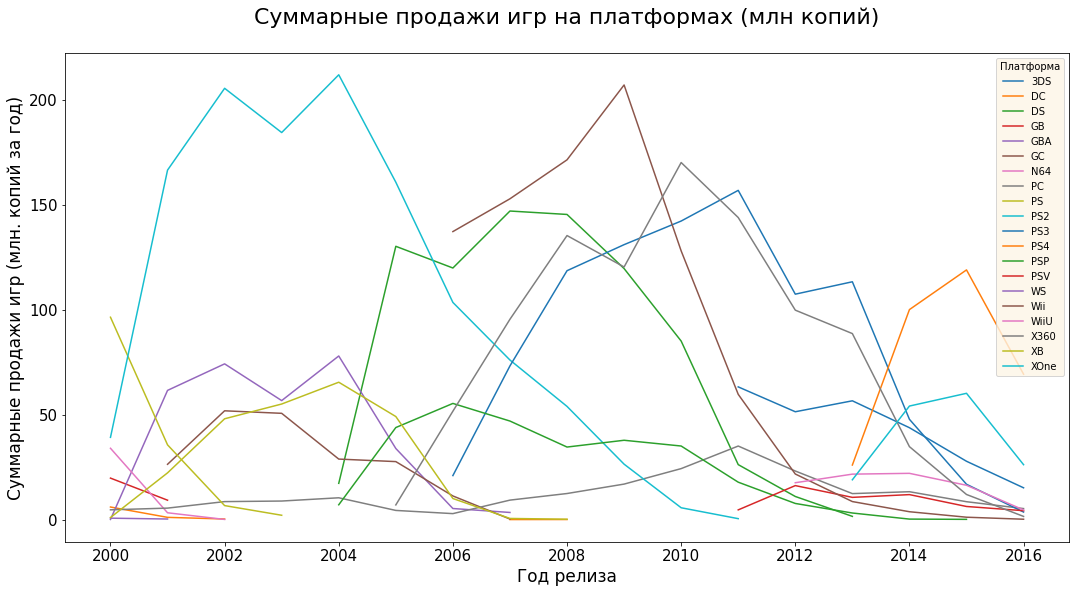

In [58]:
(
    data[data['year_of_release'] >= 2000]
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(18, 9), fontsize=15)
    .set_title('Суммарные продажи игр на платформах (млн копий)' + '\n', fontsize=22)
);
plt.legend(title='Платформа', facecolor = 'oldlace')
plt.xlabel('Год релиза', fontsize=17);
plt.ylabel('Суммарные продажи игр (млн. копий за год)', fontsize=17);

Посмотрели за какой характерный срок появлялись новые и исчезали старые платформы, для этого взяли платформы начиная с 2000 года, чтобы избежать повторения цветов. В среднем это 10 лет, срок жизни игровой платформы. Неизменным за все года остался персональный компьютер, в котором продаж относительно не так много, но зато стабильно

#### Исследование актуального периода 2013-2016 год

Взяли данные за соответствующий актуальный период. Актуальный период определили с 2013 по 2016, три года. Эти данные помогут построить прогноз на 2017 год:

In [25]:
current_period = data[data['year_of_release'] >= 2013]
current_period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   int64  
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 226.8+ KB


Определили какие платформы растут или падают по продажам:

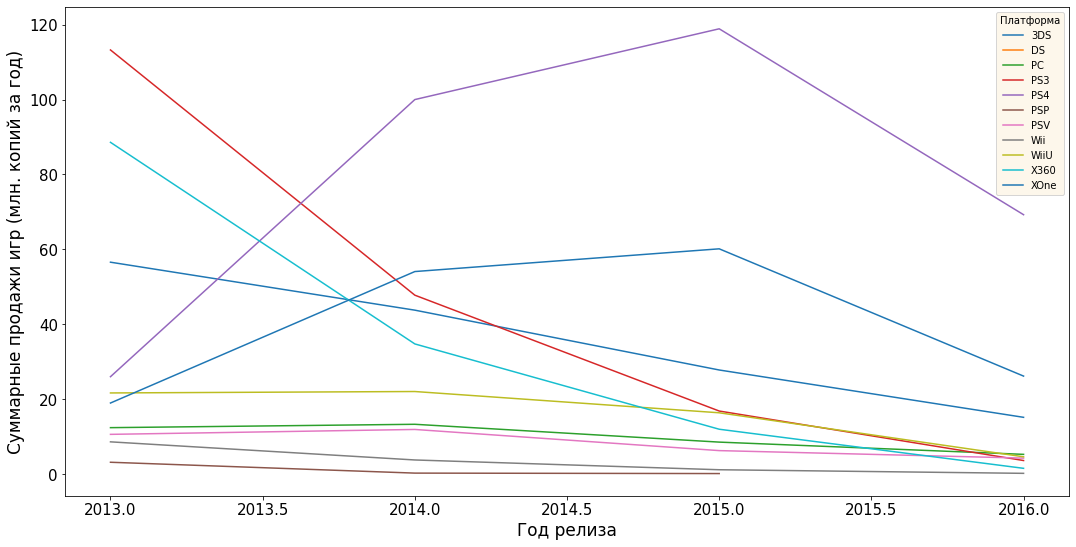

In [26]:
(
    current_period
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(18, 9), fontsize=15)
);
plt.legend(title='Платформа', facecolor = 'oldlace');
plt.xlabel('Год релиза', fontsize=17);
plt.ylabel('Суммарные продажи игр (млн. копий за год)', fontsize=17);

В целом все платформы так или иначе падают в продажах, однако лидерами по значениям являются - Sony Playstation 4, XboxOne, Nintendo 3DS

Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

Самый низкий разброс замечен на платформе Nintendo DS, но продажи относительно крайне небольшие, самый высокий разброс с аномалиями замечен на платформе Nintendo 3DS, эта платформа входит в тройку лидеров по продажам.

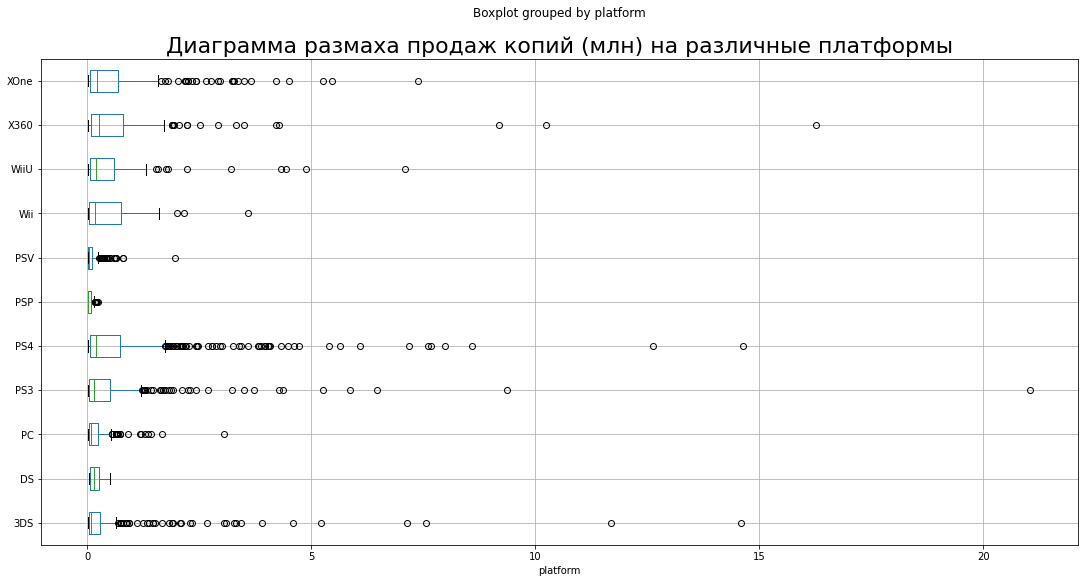

In [27]:
(
    current_period
    .boxplot('total_sales', vert = False, by='platform', figsize=(18, 9))
    .set_title('Диаграмма размаха продаж копий (млн) на различные платформы', fontsize=22)
);

##### Влияние отзывов пользователей и критиков на продажи внутри платформы Sony PlayStation 4

Посмотрели, как влияют на продажи внутри одной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами:

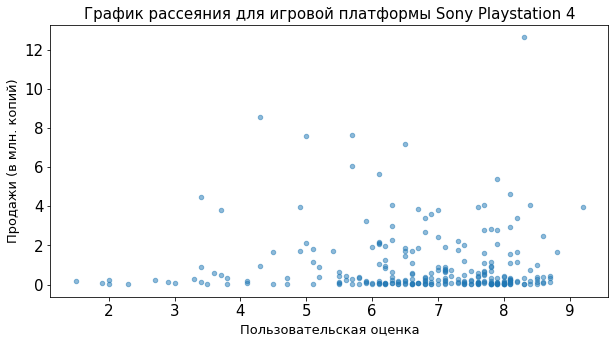

In [28]:
ps4 = current_period[current_period['platform'] == 'PS4']
(
    ps4
    .plot(x='user_score',
          y='total_sales',
          kind='scatter',
          alpha=0.5,
          fontsize=15,
          figsize=(10, 5))
);
plt.title('График рассеяния для игровой платформы Sony Playstation 4', fontsize=15);
plt.xlabel('Пользовательская оценка', fontsize=13);
plt.ylabel('Продажи (в млн. копий)', fontsize=13);

In [29]:
ps4['user_score'].corr(ps4['total_sales'])

-0.031957110204556376

Очевидной зависимости не наблюдается, однако максимальные продажи (более 5 млн копий), наблюдается при оценках не ниже 4 из 10

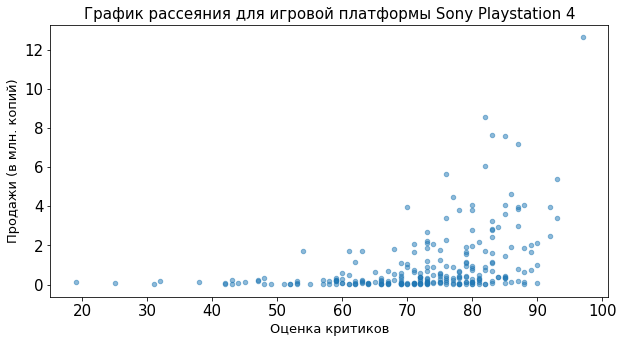

In [30]:
(
    ps4[ps4['critic_score'] != -1]
    .plot(x='critic_score',
          y='total_sales',
          kind='scatter',
          alpha=0.5,
          fontsize=15,
          figsize=(10, 5))
);
plt.title('График рассеяния для игровой платформы Sony Playstation 4', fontsize=15);
plt.xlabel('Оценка критиков', fontsize=13);
plt.ylabel('Продажи (в млн. копий)', fontsize=13);

In [31]:
ps4['critic_score'].corr(ps4['total_sales'])

0.22652606614612347

Оценка критиков оказывает более значительно влияние, чем оценка пользователей. Однако, исходя из шкалы Чеддока, можно говорить только о слабой корреляции. Вероятно, критики более точно оценивают качество игры, чем пользователи, поэтому и продажи зависят от критиков сильнее.

Выяснили, подобную статистику для остальных платформ:

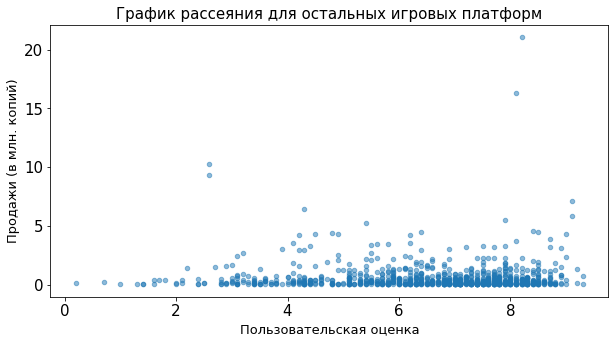

In [32]:
non_ps4 = current_period[current_period['platform'] != 'PS4']
(
    non_ps4
    .plot(x='user_score',
          y='total_sales',
          kind='scatter',
          alpha=0.5,
          fontsize=15,
          figsize=(10, 5))
);
plt.title('График рассеяния для остальных игровых платформ', fontsize=15);
plt.xlabel('Пользовательская оценка', fontsize=13);
plt.ylabel('Продажи (в млн. копий)', fontsize=13);

In [33]:
non_ps4['user_score'].corr(non_ps4['total_sales'])

-0.0011216242093378534

Отсутствие зависимости продаж от пользовательских оценок как и на платформе ps4

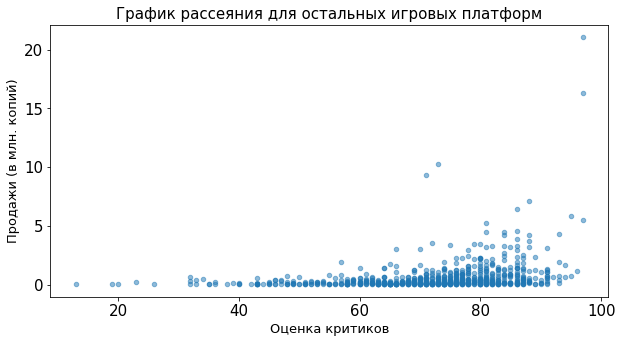

In [34]:
(
    non_ps4[non_ps4['critic_score'] != -1]
    .plot(x='critic_score',
          y='total_sales',
          kind='scatter',
          alpha=0.5,
          fontsize=15,
          figsize=(10, 5))
);
plt.title('График рассеяния для остальных игровых платформ', fontsize=15);
plt.xlabel('Оценка критиков', fontsize=13);
plt.ylabel('Продажи (в млн. копий)', fontsize=13);

In [35]:
non_ps4['critic_score'].corr(non_ps4['total_sales'])

0.20045001167553209

Более слабый уровень зависимости продаж от оценок критиков чем на платформе ps4. Слабая корреляция

Для более точной оценки зависимости для остальных платформ провели анализ еще 3 платформ - XOne, PC, 3DS:

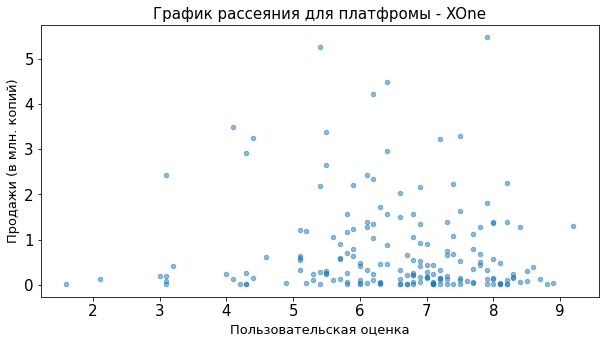

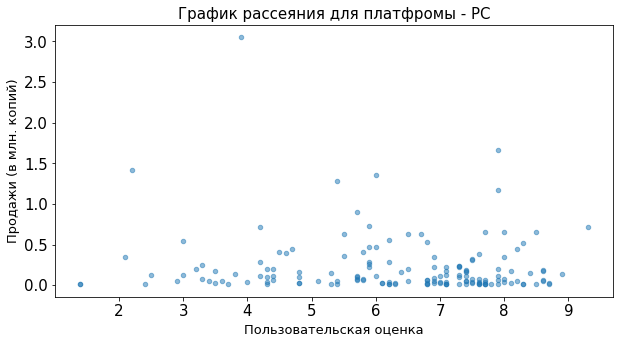

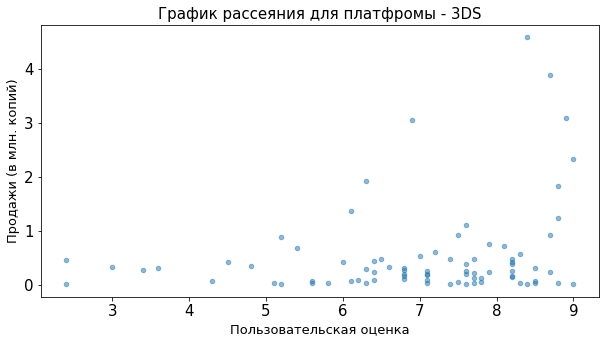

In [36]:
# Пустой список для рассчитанных корреляций в цикле
correlation = []

for platform in ['XOne', 'PC', '3DS']:
    
    df_platform = current_period[current_period['platform'] == platform]
    
    correlation.append(df_platform['user_score'].corr(df_platform['total_sales']))
    
    (
        df_platform
        .plot(x='user_score',
              y='total_sales',
              kind='scatter',
              alpha=0.5,
              fontsize=15,
              figsize=(10, 5))
    );
    plt.title(f'График рассеяния для платфромы - {platform}', fontsize=15);
    plt.xlabel('Пользовательская оценка', fontsize=13);
    plt.ylabel('Продажи (в млн. копий)', fontsize=13);
    plt.show();

In [37]:
correlation

[-0.06892505328279414, -0.0938418695247674, 0.24150411773563016]

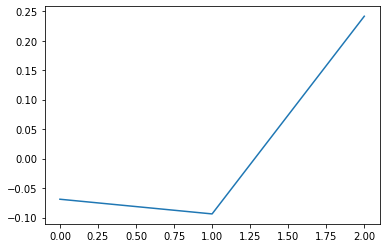

In [38]:
plt.plot(correlation);

Интересное наблюдение: для двух платформ - XOne и PC корреляция отсутствует, а вот для платформы Nintendo 3DS, заметна слабая корреляция.

Сделали тоже самое для оценок критиков:

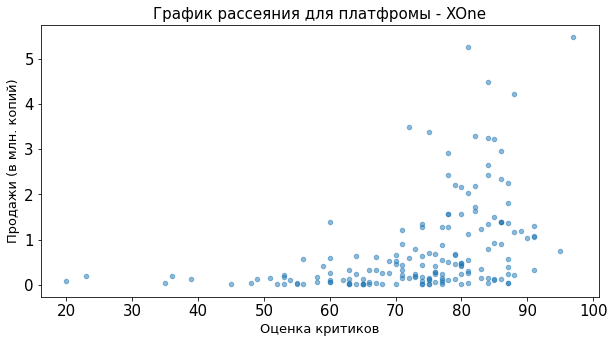

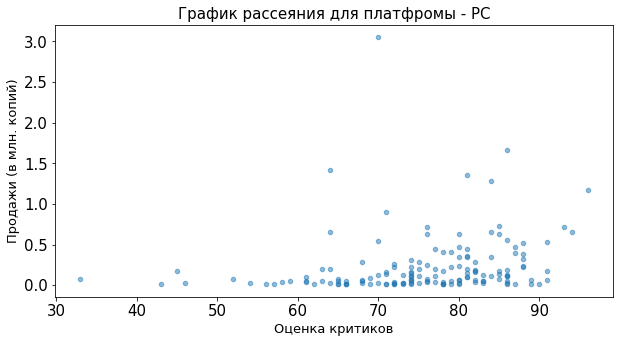

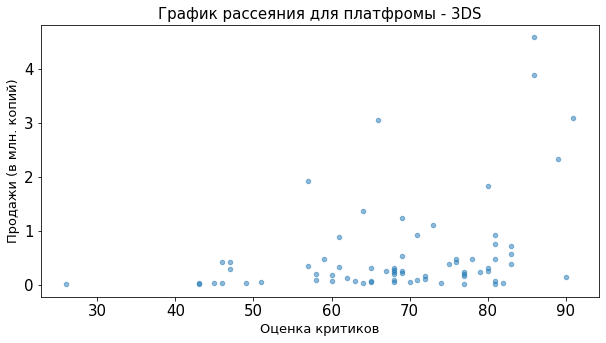

In [39]:
# Пустой список для рассчитанных корреляций в цикле
correlation = []

for platform in ['XOne', 'PC', '3DS']:
    
    df_platform = current_period[(current_period['platform'] == platform) & (current_period['critic_score'] != -1)]
    
    correlation.append(df_platform['critic_score'].corr(df_platform['total_sales']))
    
    (
        df_platform
        .plot(x='critic_score',
              y='total_sales',
              kind='scatter',
              alpha=0.5,
              fontsize=15,
              figsize=(10, 5))
    );
    plt.title(f'График рассеяния для платфромы - {platform}', fontsize=15);
    plt.xlabel('Оценка критиков', fontsize=13);
    plt.ylabel('Продажи (в млн. копий)', fontsize=13);
    plt.show();

In [40]:
correlation

[0.4169983280084017, 0.19603028294369382, 0.3570566142288103]

Увидели умеренную корреляцию на платформах: XOne и 3DS, в то время как для PC оценка критиков возможно оказывает не настолько заметное влияние.

##### Влияние жанра на продажи

Оценили влияние жанрового направления на продажи игры, построили гистограмму для оценки распределения количества игр по жанрам и диаграмму рассеяния:

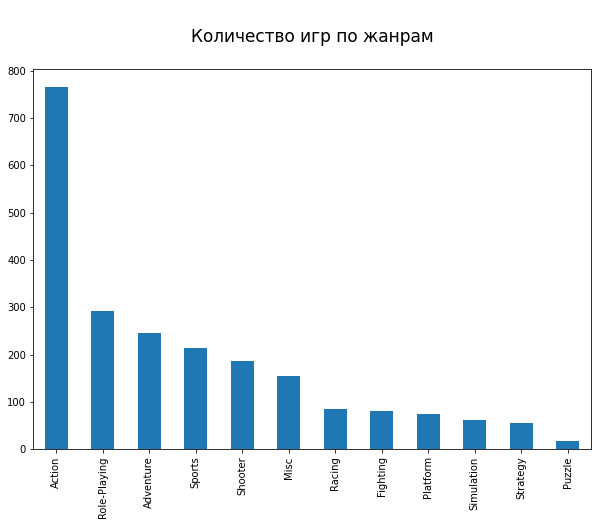

In [41]:
(
    current_period['genre']
    .value_counts()
    .plot.bar(figsize=(10, 7))
    .set_title("\n" + 'Количество игр по жанрам' + "\n", fontsize=17)
);

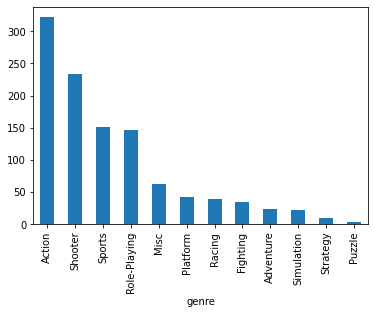

In [60]:
current_period.groupby('genre').total_sales.sum().sort_values(ascending=False).plot.bar();

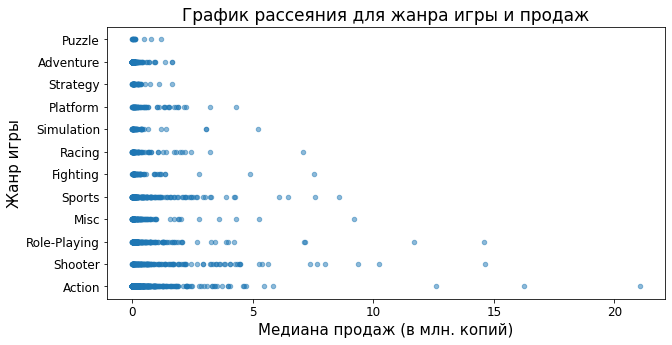

In [42]:
(
    current_period
    .plot(x='total_sales',
          y='genre',
          kind='scatter',
          alpha=0.5,
          fontsize=12,
          figsize=(10, 5))
);
plt.title('График рассеяния для жанра игры и продаж', fontsize=17);
plt.xlabel('Медиана продаж (в млн. копий)', fontsize=15);
plt.ylabel('Жанр игры', fontsize=15);

Посмотрели на общее распределение жанров и количества продаж

Сделали тоже самое по агрегированным значениям для оценки медианы продаж:

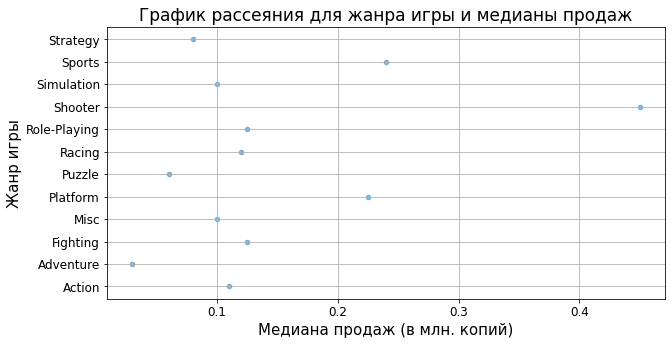

In [43]:
(
    current_period
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .reset_index()
    .plot(x='total_sales',
          y='genre',
          kind='scatter',
          alpha=0.5,
          fontsize=12,
          figsize=(10, 5),
          grid=True)
);
plt.title('График рассеяния для жанра игры и медианы продаж', fontsize=17);
plt.xlabel('Медиана продаж (в млн. копий)', fontsize=15);
plt.ylabel('Жанр игры', fontsize=15);

В целом влияние заметно, на игры в жанре Action приходится самое большое распределение, можно сказать, что этот жанр наиболее популярен в датасете. Можно предположить, что эта популярность этого жанра у разработчиков высокой частотой хороших продаж по рынку (единственный жанр с игрой у которой более 20 млн проданных копий).

В целом можно сказать, что смотря на медиану продаж усматривается несколько другая картина где жанр Shooter обладает гораздо более высокой медианой продаж. 

Выделить можно три наиболее популярные и доходные жанры - Action, Shooter, RPG (Role-Playing). Также нельзя забывать о том, что курпные AAA-проекты часто могут являться играми с несколькими жанрами, например, Action\RPG.

##### Портрет пользователя для каждого региона (NA, EU, JP)

###### ТОП-5 платформ для каждого региона

Расчитали суммарные продажи для каждого региона (NA, EU, JP):

In [44]:
region_stats_sales = \
(
    current_period
    .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)

In [45]:
region_stats_sales.sort_values(by='jp_sales', ascending=False)[:5]

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
PS3,67.81,23.35,63.50
PSV,6.10,18.59,5.04
PS4,141.09,15.96,108.74
WiiU,19.85,10.88,29.21


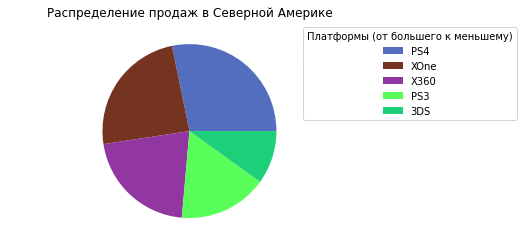

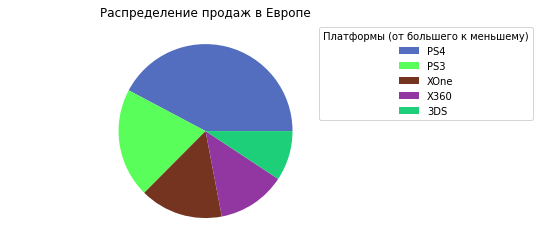

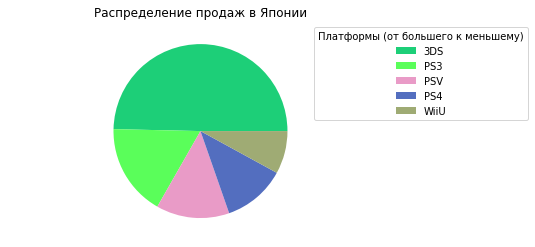

In [46]:
'''
Использование функции рандома для создания списка цветов, затем превратили его в словарь, ключи к которому равны каждой
платформе со своим цветом, цвета присвоенны к каждой платформе не только к ТОП-5, это сделано для случая когда платформа
уходит из топа, чтобы она не теряла своего цвета, далее просто по ключу платформы присваивали цвета в цикле for,
код должен был быть чуть проще, если бы не нужно было брать именно ТОП-5 по каждому региону, возникала проблема присвоения
цветов для топ-платформ каждого региона. При желании можно изменить цвета вручную обратившись к словарю colors
если не устраивают цвета - перезапусти ячейку
'''

regions = ['na_sales', 'eu_sales', 'jp_sales']

titles_dict = {'na_sales': 'Распределение продаж в Северной Америке',
              'eu_sales': 'Распределение продаж в Европе',
              'jp_sales': 'Распределение продаж в Японии'}

get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0,0xFFFFFF),range(n)))
labels = region_stats_sales.index
all_colors = get_colors(len(labels))
colors = dict(zip(labels, all_colors))

for region in regions:
    plt.title(titles_dict[region])
    top_5 = region_stats_sales[region].sort_values(ascending=False)[:5]
    patches, texts = plt.pie(
        top_5,
        labels = top_5,
        colors = [colors[key] for key in top_5.index],
        textprops=dict(color="w") )
    plt.legend(patches, top_5.index, title='Платформы (от большего к меньшему)', loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

Увидели, что в Европе и Америке лидирует PS4, а в Японии наиболее популярным является Nintendo 3DS, занимающего половину всех продаж (почти 68 млн проданных копий за три года, относительно всех остальных продаж из топа - около 75 млн проданных копий) в то время как PS4 занимает только 4 место, это вероятно связано с культурными особенностями.

###### ТОП-5 жанров для каждого региона

Расчитали суммарные продажи для каждого региона (NA, EU, JP):

In [47]:
region_stats_genre = \
(
    current_period
    .pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)

In [48]:
region_stats_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Adventure,8.25,5.82,7.14
Fighting,8.55,7.65,15.55
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14
Puzzle,1.00,1.18,0.83
Racing,20.19,2.30,12.96
Role-Playing,36.97,51.04,46.40
Shooter,87.86,6.61,109.74


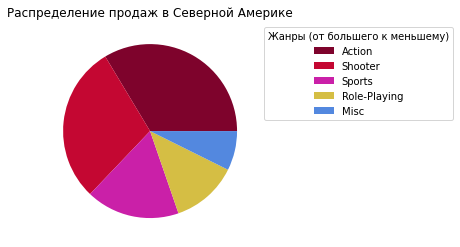

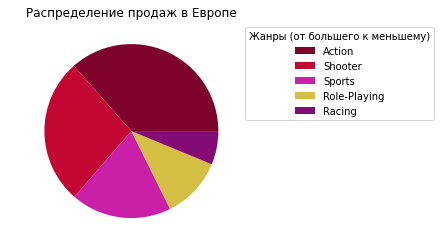

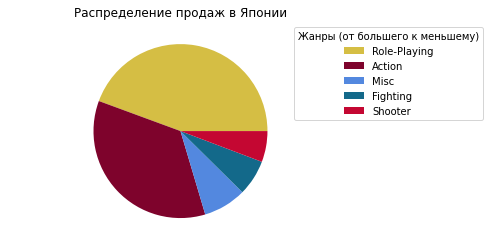

In [49]:
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0,0xFFFFFF),range(n)))
labels = region_stats_genre.index
all_colors = get_colors(len(labels))
colors = dict(zip(labels, all_colors))

for region in regions:
    plt.title(titles_dict[region])
    top_5 = region_stats_genre[region].sort_values(ascending=False)[:5]
    patches, texts = plt.pie(
        top_5,
        labels = top_5,
        colors = [colors[key] for key in top_5.index],
        textprops=dict(color="w") )
    plt.legend(patches, top_5.index, title='Жанры (от большего к меньшему)', loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

Как и в ситуации с платформами в Японии в отличие от Европы и Северной Америки больше любят RPG, хотя жанр Action также хорошо распространен в отличии от ситуации с палтформами, где лидирующее положение в Европе и Америке PS4, оказывается на одном из последних мест в Японии, здесь Action занимает второе место.

###### Влияние рейтинга ESRB на продажи в отдельном регионе

Для оценки влияния рейтинга на продажи построили график рассеяния для каждого региона:

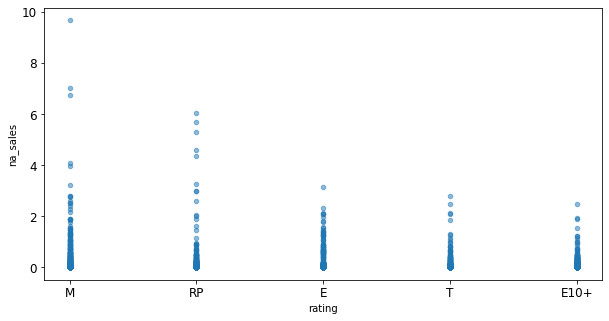

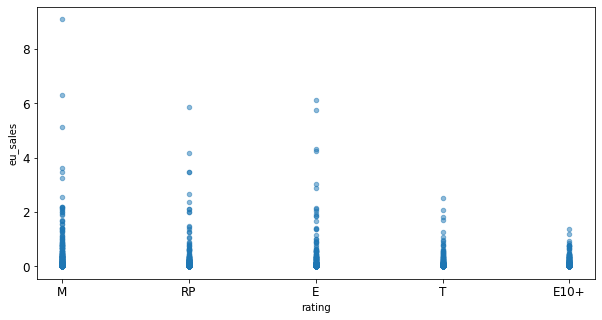

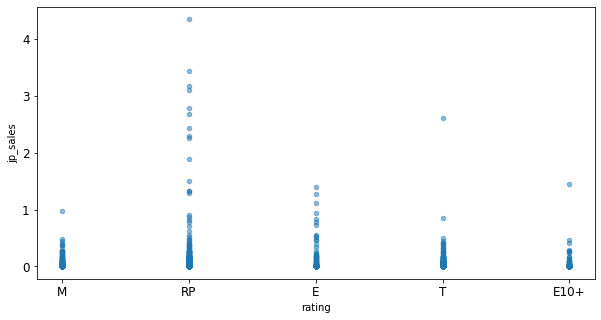

In [50]:
for region in regions:  
    (
        current_period[~current_period['rating'].isna()]
        .plot(x='rating',
              y=region,
              kind='scatter',
              alpha=0.5,
              fontsize=12,
              figsize=(10, 5))
    );

В целом влияние рейтинга более заметно в Европе, однако, это могут быть выбросы, необходимо посмотреть на сумму продаж по рейтингам, для оценки в сравнении.

Далее, построили линейный график по сумме продаж по рейтингу:

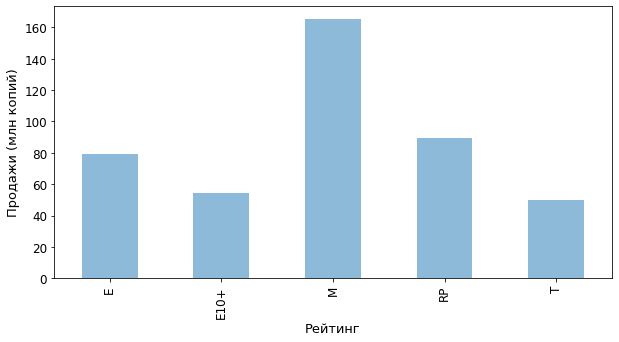

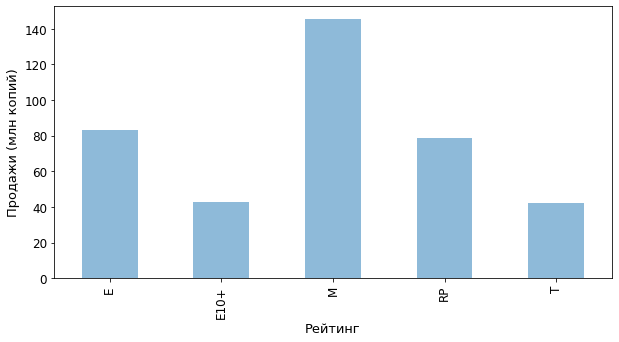

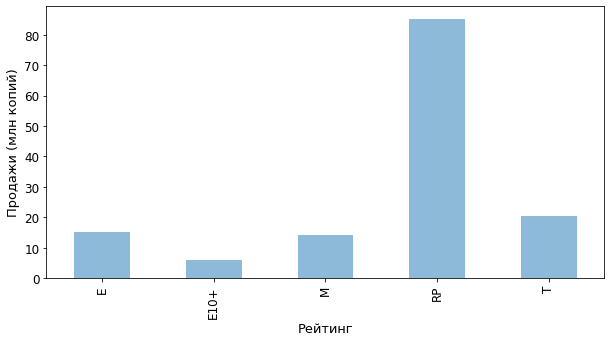

In [51]:
for region in regions:  
    (
        current_period[~current_period['rating'].isna()]
        .pivot_table(index='rating', values=region, aggfunc='sum')
        .reset_index()
        .plot(x='rating',
              y=region,
              kind='bar',
              alpha=0.5,
              fontsize=12,
              figsize=(10, 5),
              legend=False)
    );
    plt.xlabel('Рейтинг', fontsize=13)
    plt.ylabel('Продажи (млн копий)', fontsize=13)
    plt.show()

Увидели, что пик приходится в основном на рейтинг *M*, далее в Европе и Америке падает и только в Японии продолжает расти, в Японии более популярен рейтинг без определенного ESRB классификатора (возможно из-за того, что в Японии действует свое рейтинговое агентство - CERO), можно предположить - рейтинг может стать одной из причин уменьшения продаж.

#### Вывод

Провели исследовательский анализ данных:
- общие продажи по годам
- продажи по платформам
- актуальный период (последние три года):
 - влияние отзывов пользоавтелей и критиков на продажи
 - влияние жанра на продажи
 
Установили ТОП-5 платформ, жанров для каждого региона изучили влияние рейтинга рейтинга ESRB на продажи.

В целом, можно сказать, что два региона - Европа и Северная Америка схожы друг с другом, вероятно из-за культурной близости, в этих регионах преобладает платформа PS4, отличаются вторые места, так в Америке на втором месте после PS4 стоит XOne, а в Европе PS3. А вот с Японией и с жанром и платформой дела обстоят иначе: Nintendo 3DS, занимающий половину всех продаж в этой стране (почти 68 млн проданных копий за три года, относительно всех остальных продаж из топа - около 75 млн проданных копий) в то время как PS4 занимает только 4 место, это вероятно связано с культурными особенностями. Представителей жанра RPG в Японии любят значительно больше, чем Action (главный жанр для Европы и Америке), хотя и Action достаточно ценится японцами, в отличии от PS4.

Исходя из вышесказанного, можно сделать предположение о высокой эффективности продаж в Японии, если взять отношение количества геймеров к общему количеству населения, но надо понравиться японцам, например, разработать RPG на Nintendo 3DS. Население Японии любит компьютерные игры, но остаются вопросы по поводу рейтинга, исследование показало, что японцы больше любят игры к которым ESRB не присвоила свой классификатор, вероятно из-за того что в Японии действует своя рейтинговая организация - CERO

Однако, если говорить об общих продажах то, конечно выигрывает Европа с Америкой, а это Action на PS4 с рейтингом *M*

### Проверка гипотез

**Проверка гипотезы:** средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые;

```
H_0: Средние пользовательские рейтинги (user_score) XOne = Средние пользовательские рейтинги (user_score) PC`
H_1: Средние пользовательские рейтинги (user_score) XOne ≠ Средние пользовательские рейтинги (user_score) PC`
alpha = 0.05
```

In [62]:
results = st.ttest_ind(
    current_period.loc[(~current_period['user_score'].isna()) & (current_period['platform'] == 'XOne'), 'user_score'],
    current_period.loc[(~current_period['user_score'].isna()) & (current_period['platform'] == 'PC'), 'user_score'],
    equal_var=False)

alpha = .05

if results.pvalue > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


In [53]:
results.pvalue

0.14759594013430463

**Проверка гипотезы:** средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

```
H_0: Средние пользовательские рейтинги (user_score) жанра Action = Средние пользовательские рейтинги жанра Sports`
H_1: Средние пользовательские рейтинги (user_score) жанра Action ≠ Средние пользовательские рейтинги жанра Sports`
alpha = 0.05
```

In [61]:
results = st.ttest_ind(
    current_period.loc[(~current_period['user_score'].isna()) & (current_period['genre'] == 'Action'), 'user_score'],
    current_period.loc[(~current_period['user_score'].isna()) & (current_period['genre'] == 'Sports'), 'user_score'],
    equal_var=False)

alpha = .05

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


In [55]:
results.pvalue

1.4460039700704315e-20

#### Вывод

Проверили две гипотезы:
- Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевые гипотезы сформулировали просто - взяли изначальное предположение, которые затем проверили в t-test'е с двусторонним критерием, так как нулевая гипотеза предполагает равенство или не равенство пользовательских рейтингов, а не утверждение о том, что пользовательский рейтинг по одному признаку больше или меньше. Дисперсии расчитали независимо, так как нет оснований говорить, что они равны для сравниваемых значений.

Отвергли первую гипотезу и не получилось отвергнуть вторую

### Общий вывод

Мы сделали определенную работу в которой из нескольких таблиц мы предобработали. Более подробно о каждом этапе есть вывод. В конце проекта нам необходимо было проверить две гипотезы:

- Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Итог: средние пользовательские рейтинги платформ вероятно разные, и средние пользовательские рейтинги по жанрам вероятно разные.

По итогам исследовательского анализа данных можно сделать прогноз на 2017 год в игровой индустрии.

Был анализирован период с 2013-2016 года, и в этот период для диагностики у нас были выбраны 2 платформы: PS4 и Nintendo 3DS которые на этот момент обладали самыми большими продажами и были в тренде, однако, если PS4 лидер в Европе и Северной Америке, 
Жанры игр страны предпочитают разные, но большинство склоняется к жанру Shooter. Также в ТОП жанров попали такие как: Fighting (в Северной Америке), Role-Playing (в Японии).

А вот ТОП рейтинг от организации ESRB можно считать категорию M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет) в Европе и Северной Америке, в то время как в Японии топ-рейтингом по продажам является не оцененный организацией ESRB, возможно из-за того, что в Японии действует своя рейтинговая организация - CERO.

Сложно сделать выбор для достижения максимальных продаж из-за фундаментальных различий вкусов и предпочтений народов Европы и Америки от Японии. Если говорить об абсолютных продажах, то рынки Европы и Америки значительно больше, а прдепочтения примерно одинаковые, однако, в Японии высокая эффективность продаж, так как местное населеление (судя по продажам) любит компьютерные игры. Если компания-разработчик специализируется на разработке RPG, то может сделать усилие на многоплатформенность (Nintendo 3DS, PS4, PS3). Также не стоит забывать про пользователей ПК,так как хоть продажи на данную платформу достаточно небольшие (судя по продажам на PS4, вероятно из-за "пиратства"), но зато стабильные на протяжении многих лет, в то время как платформы стареют, исчезают и появляются новые в среднем за 10 лет. Если компания-разработчик занимается шутерами или Action (англ. «действие», экшен-игры), то также не уйти от многоплатформенности, так как Action достаточно высоко ценится и в Японии (второе место в ТОП-5), а вот консоль PS4 стоит только на 4-ом месте.

Лучший выбор на 2017 на основе исследования можно сделать такой: многоплатформенный Action\RPG (ПК, PS4, Nintendo 3DS), с рейтингом *М* («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет)